In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#since only some values are missing out with null's 
data.dropna(inplace=True) ## drops na , false is also returning same thing 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

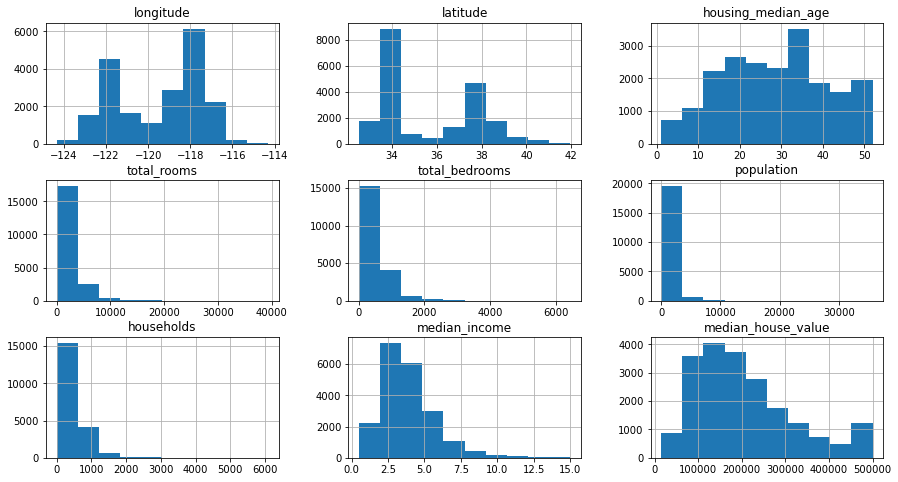

In [5]:
data.hist(figsize=(15,8))

<AxesSubplot:>

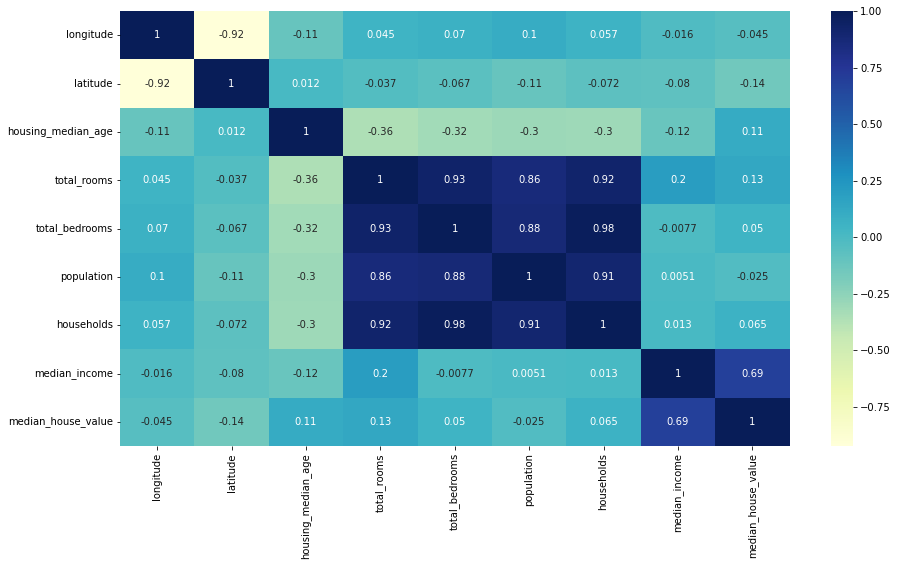

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [7]:
#preprocessing, making bellcurve for my features 
data['total_rooms'] = np.log(data['total_rooms']+1)
data['total_bedrooms'] = np.log(data['total_bedrooms']+1)
data['population']=np.log(data['population'] + 1)
data['households'] = np.log(data['households']+1)


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

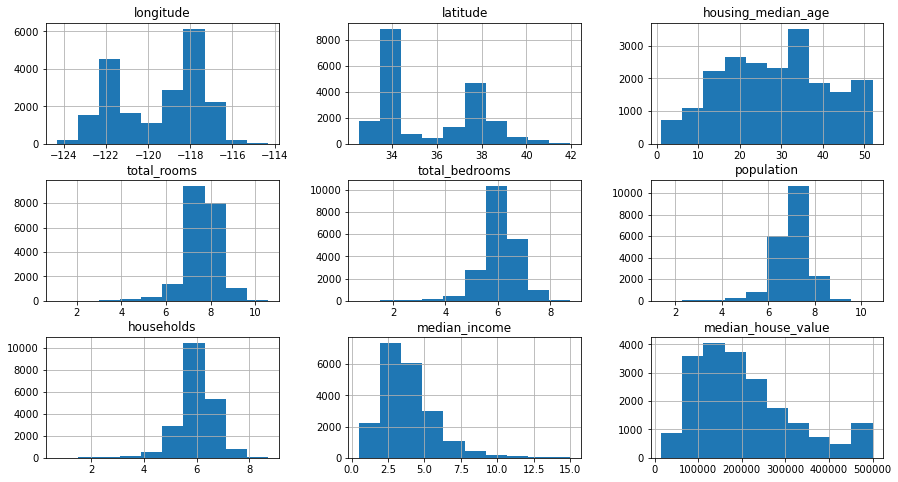

In [8]:
data.hist(figsize=(15,8))

In [9]:
# train_data.ocean_proximity.value_counts()
# isntead of assigning ordinal values , we will make them seperate features 
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<AxesSubplot:>

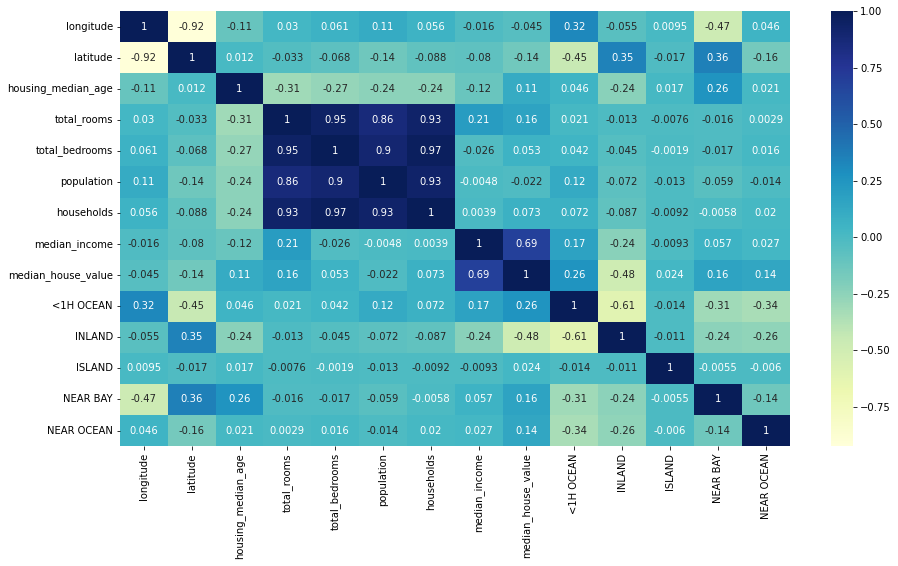

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu") #split the categorical features in binary one's using get_dummies

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

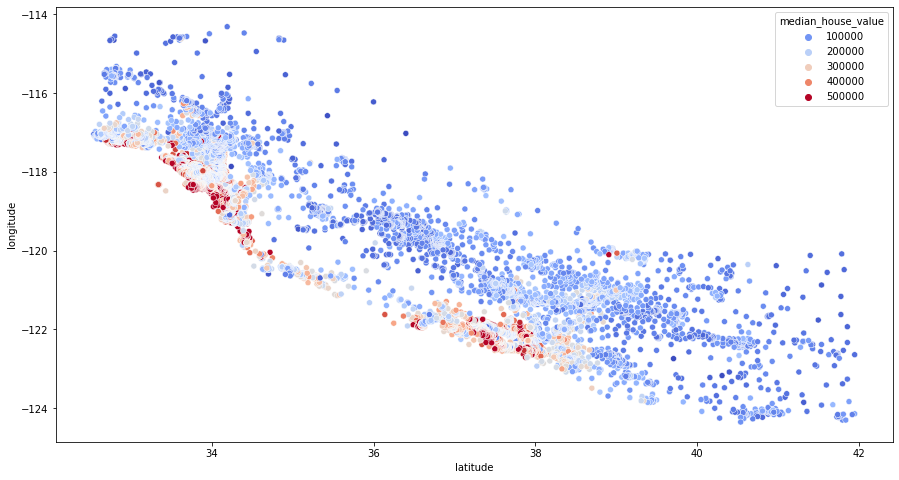

In [11]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=data,hue="median_house_value",palette = "coolwarm")

In [12]:
#some feature engineering , getting new features 
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms'] # adding these features at the same time
data['household_rooms'] = data['total_rooms'] / data['households']

<AxesSubplot:>

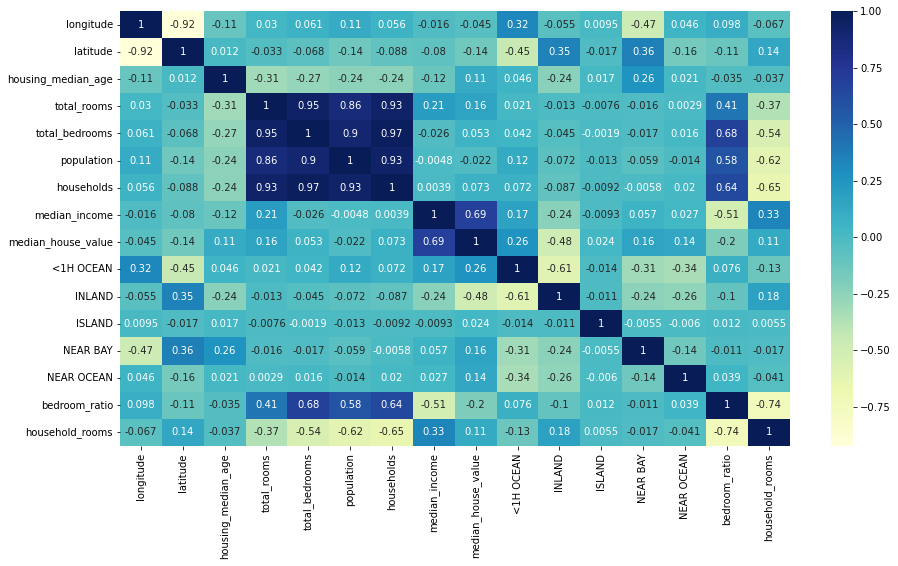

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [14]:
# now lets train the data on linear regression and then test it out 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
Scaler=StandardScaler() #getting object to use Scaler methods later

x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)  #splitting 


x_train_s=Scaler.fit_transform(x_train) #standardizing the train features 
reg = LinearRegression()
reg.fit(x_train_s,y_train)

LinearRegression()

In [15]:
x_test_s=Scaler.transform(x_test) 

reg.score(x_test_s,y_test)  #66.5 % accuracy on prediction by using multiple linear regression

0.6713318168583555

In [16]:
from sklearn.ensemble import RandomForestRegressor 


# Initialize and train the Random Forest model
forest = RandomForestRegressor()
forest.fit(x_train_s, y_train)


RandomForestRegressor()

In [17]:
# forest.score(x_test,y_test) #94 % accuracy 
forest.score(x_test_s, y_test)
#fitting and transformation - fit_transform retains the column names but transform() does not retain the column names 

0.8193761332730073

### why does .score on training data gives negetive accuracy ? ??? 

In [22]:
# from sklearn.model_selection import GridSearchCV

# forest = RandoamForestRegressor()
# param_grid = {
#     "n_estimators": [100, 200, 300],
#     "min_samples_split": [2, 4],
#     "max_depth": [None, 4, 8]
# }

# grid_search = GridSearchCV(forest,param_grid, cv=5,scoring="neg_mean_squared_error",return_train_score=True)
# grid_search.fit(x_train_s,y_train)

In [ ]:
# best_forest = grid_search.best_estimator_

In [23]:
# best_forest.score(x_test_s,y_test)